## Importations

In [1]:
import numpy as np
import keras 
import pylab as pl

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32')/255

# 1 Advantages of Stochastic Gradient methods compared to standard Gradient descent

## Simulation of logistic regression data

Text(0.5, 1.0, 'Parameters / Coefficients')

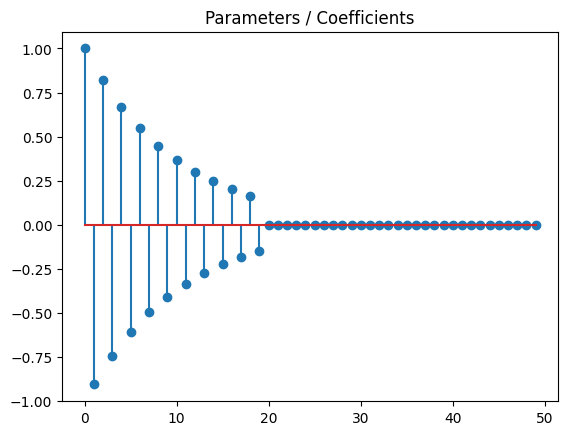

In [3]:
n_features = 50
n_samples = 1000
idx = np.arange(n_features)
# coefs = np.multiply(np.cos(idx/n_features*4*np.pi),np.exp(-idx/20))#((-1) ** idx) * np.exp(-idx / 10.)
coefs = (-1)**idx * np.exp(-idx/10)
coefs[20:] = 0.
pl.stem(coefs)
pl.title("Parameters / Coefficients")

In [4]:
from numpy.random import multivariate_normal
from scipy.linalg.special_matrices import toeplitz

def sigmoid(t):
    """Sigmoid function"""
    return 1. / (1. + np.exp(-t))


def simu_logreg(coefs, n_samples=1000, corr=0.5):
    """Simulation of a logistic regression model
    
    Parameters
    ----------
    coefs : `numpy.array`, shape (n_features,)
        Coefficients of the model
    
    n_samples : `int`, default=1000
        Number of samples to simulate
    
    corr : `float`, default=0.5
        Correlation between features i and j is corr^|i - j|

    Returns
    -------
    A : `numpy.ndarray`, shape (n_samples, n_features)
        Simulated features matrix. It samples of a centered Gaussian 
        vector with covariance given by the Toeplitz matrix
    
    b : `numpy.array`, shape (n_samples,)
        Simulated labels
    """
    cov = toeplitz(corr ** np.arange(0, n_features))
    A = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    p = sigmoid(A.dot(coefs))
    b = np.random.binomial(1, p, size=n_samples)
    b = 2 * b - 1
    return A, b

C:\Users\lmmla\AppData\Local\Temp\ipykernel_16704\28908515.py:2: DeprecationWarning: Please use `toeplitz` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import toeplitz


In [5]:
A, b = simu_logreg(coefs, n_samples, 0.2)

In [6]:
def loss_logreg(x):
    return (1/n_samples) * np.sum(np.log(1 + np.exp(-np.multiply(b, A.dot(x)))))

def grad_logreg(x):
    """Logistic gradient"""
    return -(1/n_samples) * np.multiply(b, 1/ (1 + np.exp(np.multiply(b,A.dot(x))))).T.dot(A)

In [7]:
from scipy.optimize import check_grad
x0 = np.random.randn(50)
print("Verification of function grad_logreg : ", check_grad(loss_logreg, grad_logreg, x0))

Verification of function grad_logreg :  1.167071317290754e-07


In [8]:
def smoothness_const_loreg(A):
    """Lipschitz constant for logistic loss"""    
    return (1/(4*n_samples)) * norm(A, ord=2)**2

In [9]:
from numpy.linalg import norm

def GD(x0, f, grad_f, step, n_iter, x_true):
    X = [x0]
    D = []
    Obj = []
    x = x0.copy()
    for epoch in range(n_iter):
        x -= step*grad_f(x)
        X.append(np.array([x[0], x[1]]))
        D.append(norm(x - x_true, ord=2))
        Obj.append(f(x)-f(x_true)**2)
    return x, np.array(X), np.array(D), np.array(Obj)

In [10]:
x0 = np.zeros(n_features)
n_iter = 200
S = 1/smoothness_const_loreg(A)

x_star, Points, Distances, Objectives = GD(x0, loss_logreg, grad_logreg, S, n_iter, coefs)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_16704\3042801086.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return x, np.array(X), np.array(D), np.array(Obj)


<StemContainer object of 3 artists>

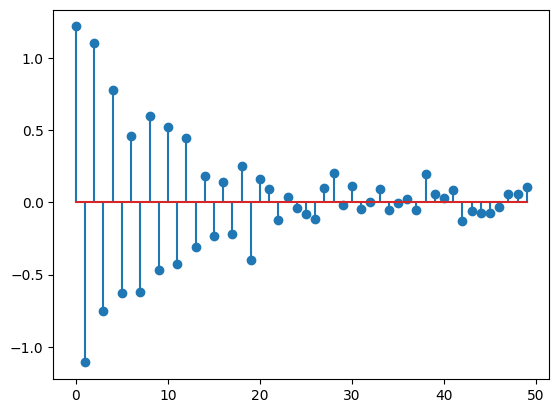

In [11]:
pl.stem(x_star)

In [12]:
def function(x1,x2):
    return loss_logreg(np.concatenate((np.array([x1,x2]), coefs[2:])))

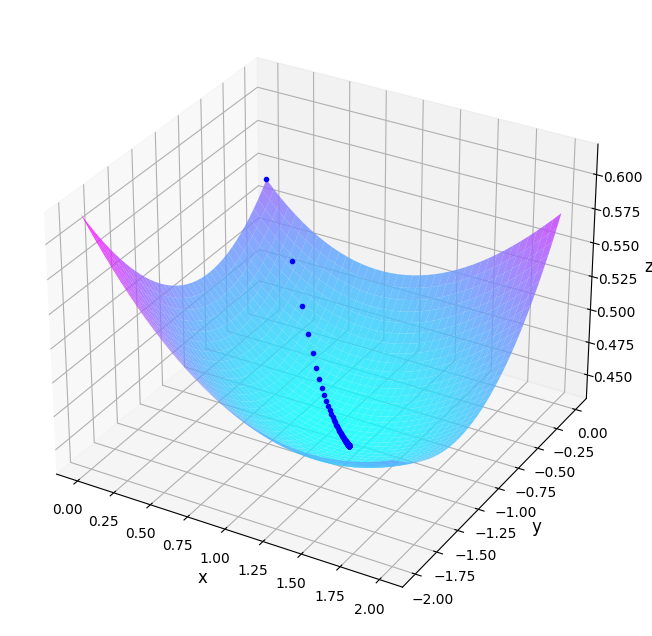

In [13]:
e=0.0

u = np.linspace(0, 2, 40)
v = np.linspace(-2, 0, 40)
Z = pl.zeros((40,40))

for i in range(40):
    for j in range(40):
        Z[j,i] = function(u[i],v[j])
X, Y = np.meshgrid(u, v)
#Z = function(X, Y)
 
fig = pl.figure(figsize=(10, 8))
ax = pl.axes(projection='3d')
 
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.8)
 
ax.set_title('', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
#ax.scatter(x_star[0], x_star[1], function(x_star[0], x_star[1])+e, c='black')
for point in Points:
    ax.plot(point[0], point[1], function(point[0], point[1])+e, 'b.',  zorder=4)

In [14]:
import time

Sizes = range(10000, 100000, 5000)
Times = []
for N in Sizes:
    n_samples = N
    n_features = 50
    A, b = simu_logreg(coefs, n_samples, 0.2)
    x0 = np.zeros(n_features)
    n_iter = 200
    S = 1/smoothness_const_loreg(A)
    start = time.time()
    x_star, Points, Distances, Objectives = GD(x0, loss_logreg, grad_logreg, S, n_iter, coefs)
    end = time.time()
    t = end - start
    Times.append(t)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_16704\3042801086.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return x, np.array(X), np.array(D), np.array(Obj)


Text(0, 0.5, 'Computation time (sec)')

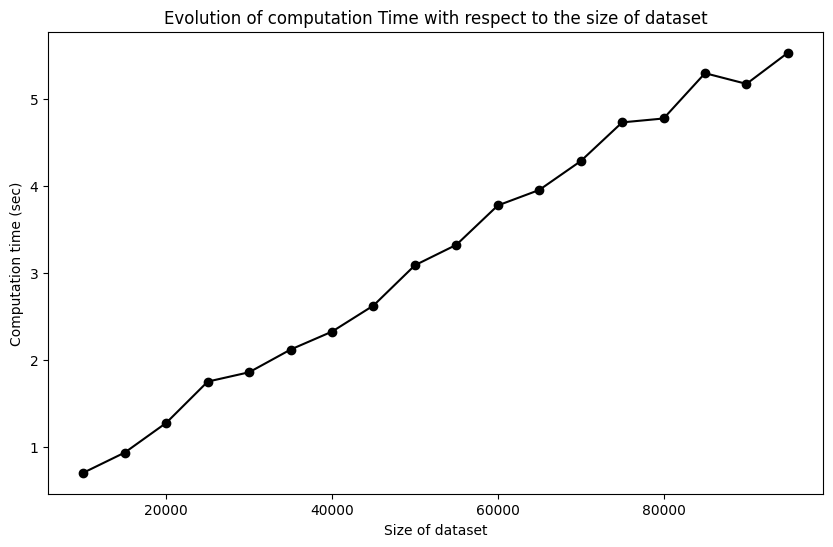

In [15]:
fig, ax = pl.subplots(1,1, figsize=(10,6))
ax.plot(Sizes, Times, color='black')
ax.scatter(Sizes, Times, color='black')
ax.set_title('Evolution of computation Time with respect to the size of dataset')
ax.set_xlabel('Size of dataset')
ax.set_ylabel('Computation time (sec)')

# Momentum

In [16]:
def momentum(x0, f, grad_f, step, beta, n_iter, x_true):
    X = [x0]
    D = []
    Obj = []
    x = x0.copy()
    V  = 0
    for epoch in range(n_iter):
        delta = grad_f(x)
        V = beta*V + (1 - beta)*delta
        x -= step*V
        X.append(np.array([x[0], x[1]]))
        D.append(norm(x - x_true, ord=2))
        Obj.append(f(x)-f(x_true)**2)
    return x, np.array(X), np.array(D), np.array(Obj)

In [17]:
x0 = np.zeros(n_features)
n_iter = 200
S = 1/smoothness_const_loreg(A)
beta = 0.8

x_star_mom, Points_mom, Distances_mom, Objectives_mom = momentum(x0, loss_logreg, grad_logreg, S, beta, n_iter, coefs)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_16704\1142507738.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return x, np.array(X), np.array(D), np.array(Obj)


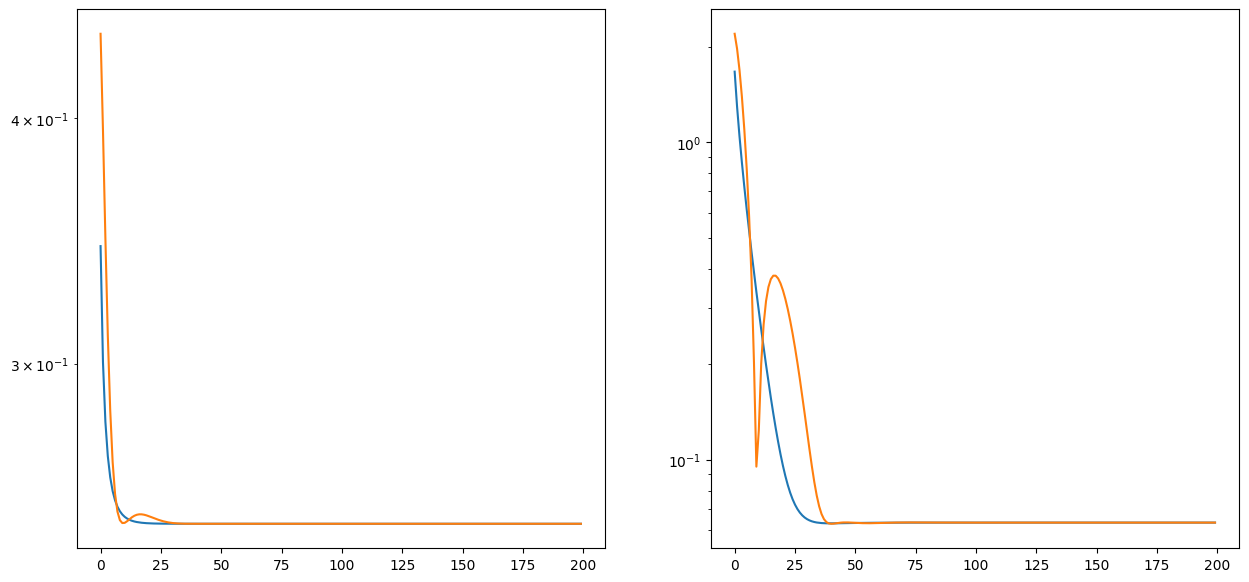

In [18]:
fig, ax = pl.subplots(1,2, figsize=(15,7))
ax[0].semilogy(range(len(Objectives)), Objectives)
ax[0].semilogy(range(len(Objectives_mom)), Objectives_mom)
ax[1].semilogy(range(len(Distances)), Distances)
ax[1].semilogy(range(len(Distances_mom)), Distances_mom)

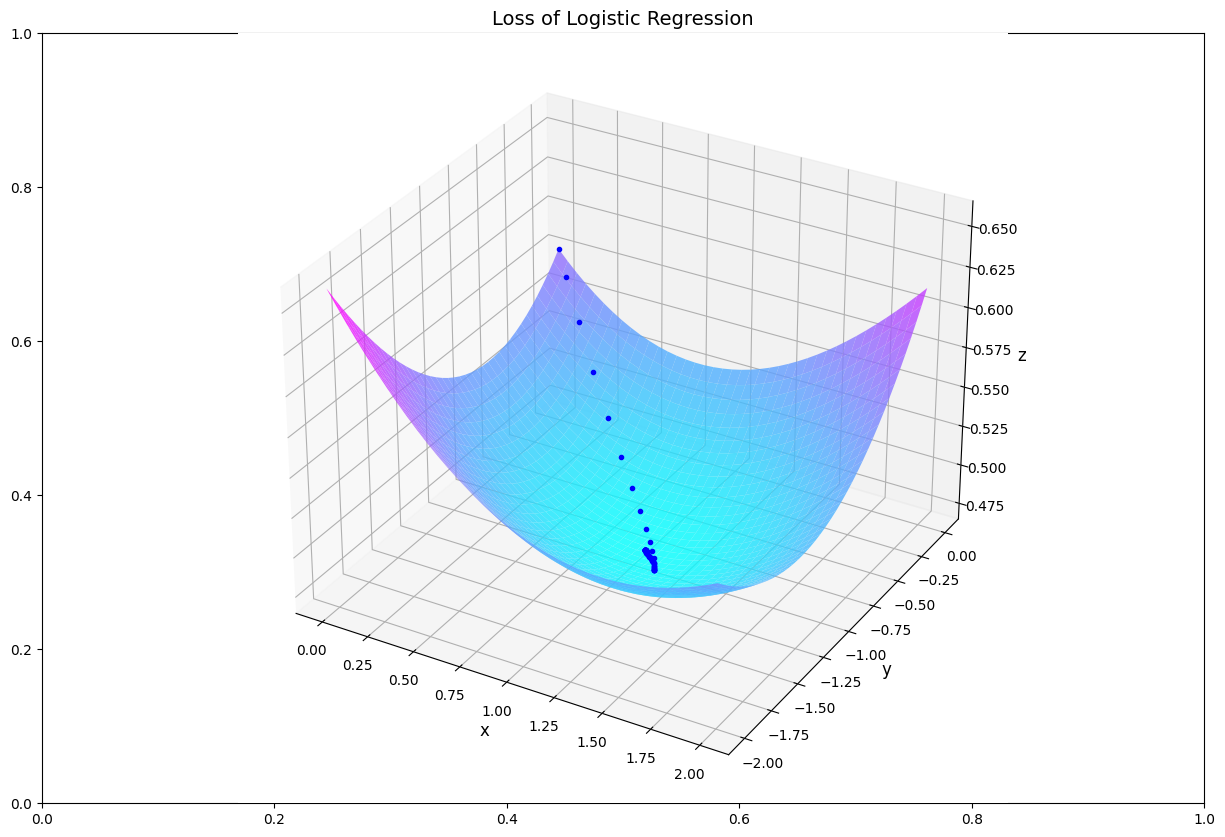

In [19]:
e=0.0

u = np.linspace(0, 2, 40)
v = np.linspace(-2, 0, 40)
Z = pl.zeros((40,40))

for i in range(40):
    for j in range(40):
        Z[j,i] = function(u[i],v[j])
X, Y = np.meshgrid(u, v)
#Z = function(X, Y)
 
fig, ax = pl.subplots(1,1, figsize=(15, 10))
ax = pl.axes(projection='3d')
 
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.8)
 
ax.set_title("Loss of Logistic Regression", fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
for point in Points_mom:
    ax.plot(point[0], point[1], function(point[0], point[1])+e, 'b.',  zorder=4)

# Neural Network

In [20]:
X = torch.from_numpy(train_images[:1000,]).float()
y = torch.from_numpy(train_labels[:1000,]).float()
#y = y.view(len(y), 1)

NameError: name 'torch' is not defined

In [ ]:
from keras import layers 

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu') (inputs)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu') (inputs)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu') (inputs)
x = layers.Flatten() (x)
outputs = layers.Dense(10, activation='softmax')(x)
model_ConvNN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
n_in = X.shape[1]
n_h1 = 500
n_h2 = 300
n_out = 10

nb_epoch = 1000
alpha = 0.1

In [ ]:
import torch

W1 = 0.1*torch.randn(n_in,n_h1)
W1.requires_grad = True
b1 = torch.randn(1,n_h1)
b1.requires_grad = True

W2 = 0.1*torch.randn(n_h1,n_h2)
W2.requires_grad = True
b2 = torch.randn(1,n_h2)
b2.requires_grad = True

W3 = 0.1*torch.randn(n_h2,n_out)
W3.requires_grad = True
b3 = torch.randn(1,n_out)
b3.requires_grad = True

In [ ]:
def model(X, W1, W2, b1, b2):
    A0 = X
    Z1 = X.mm(W1) + b1
    A1 = torch.relu(Z1)
    Z2 = A1.mm(W2) + b2
    A2 = torch.relu(Z2)
    Z3 = A2.mm(W3) + b3
    softmax = torch.nn.Softmax()
    A3 = softmax(Z3)
    hat_y = A3
    return hat_y

In [ ]:
pred = model(X, W1, W2, b1, b2)
categorical_cross_entropy = torch.nn.CrossEntropyLoss()
loss = categorical_cross_entropy(pred, y.to(torch.int64))

C:\Users\lmmla\AppData\Local\Temp\ipykernel_12032\1059480415.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A3 = softmax(Z3)


In [ ]:
for num_epoch in range(0, nb_epoch):

    # --- a) Forward pass: X (n_in, m), hat_y (n_out, m)
    hat_y = model(X, W1, W2, b1, b2)

    # -- We clip hat_y in order to avoid log(0) in the loss
    eps = 1e-10
    hat_y = torch.clamp(hat_y, eps, 1-eps)

    # --- b) Computing the loss/cost
    # --- START CODE HERE (03)
    categorical_cross_entropy = torch.nn.CrossEntropyLoss()
    loss = categorical_cross_entropy(hat_y, y.to(torch.int64))
    cost = loss.mean()
    # --- END CODE HERE

    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, cost))

    # --- c) Backward pass
    cost.backward()

    # --- "with torch.no_grad()" temporarily set all the requires_grad flag to false
    with torch.no_grad():
        # --- d) perform the update of the parameters W1, b1, ...
        # --- the gradients dLoss/dW1 is stored in W1.grad, dLoss/db1 is stored in b1.grad, ...
        # --- START CODE HERE (04)
        W1 -= alpha*W1.grad
        b1 -= alpha*b1.grad
        W2 -= alpha*W2.grad
        b2 -= alpha*b2.grad
        W3 -= alpha*W3.grad
        b3 -= alpha*b3.grad
        # --- END CODE HERE
    # --- We need to set to zero all gradients (otherwise they are cumulated)
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

C:\Users\lmmla\AppData\Local\Temp\ipykernel_12032\1059480415.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A3 = softmax(Z3)


epoch 0, loss 2.32243013381958
epoch 500, loss 1.6976920366287231


In [ ]:
categorical_cross_entropy = torch.nn.CrossEntropyLoss()

def function2(x1,x2):
    W = 0.1*torch.randn(n_h1,n_h2)
    W[28*13+9,200] = x1
    W[28*13+9,250] = x2
    return categorical_cross_entropy(model(X, W1, W, b1, b2), y.to(torch.int64))

In [ ]:
function2(3,2)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_12032\1059480415.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A3 = softmax(Z3)


tensor(2.3097, grad_fn=<NllLossBackward0>)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_12032\1059480415.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  A3 = softmax(Z3)


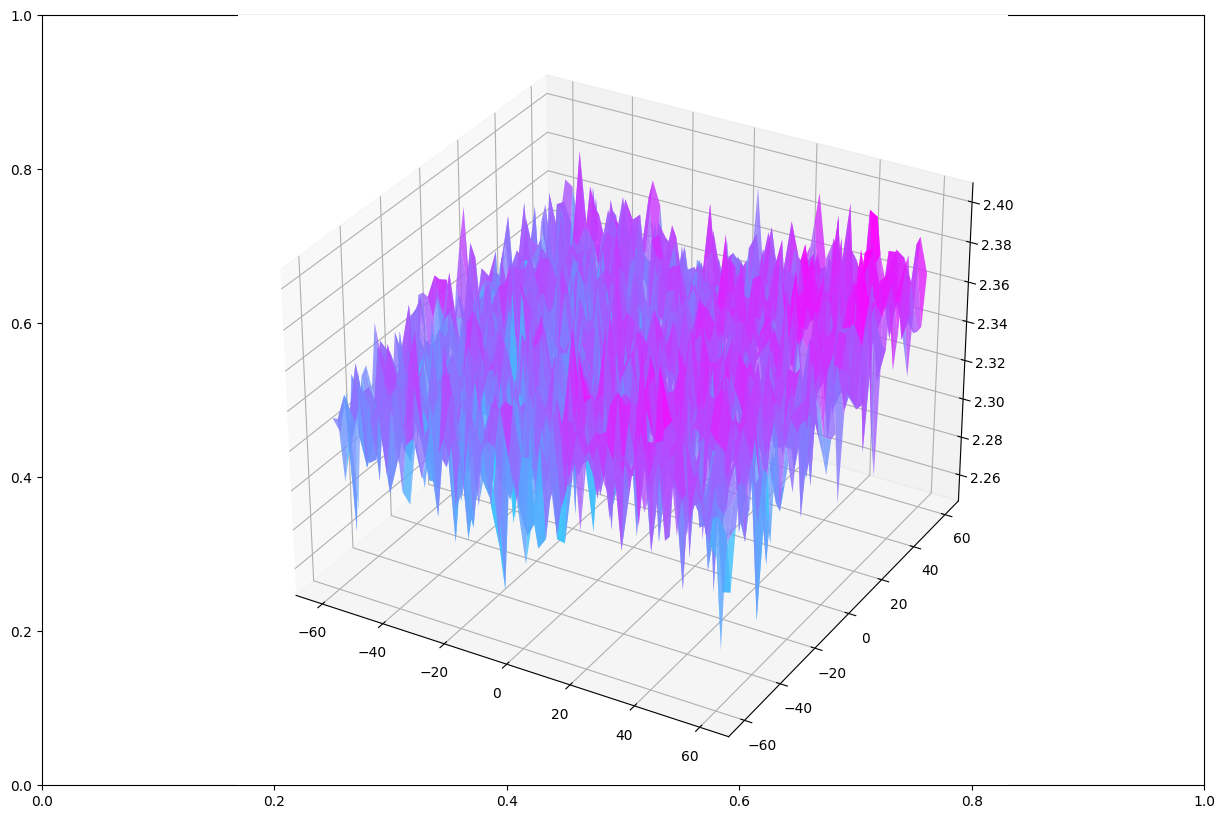

In [ ]:
p=50
u = np.linspace(-60, 60, p)
v = np.linspace(-60, 60, p)
Z = pl.zeros((p,p))

for i in range(p):
    for j in range(p):
        Z[i,j] = function2(u[i],v[j])
U, V = np.meshgrid(u, v)
#Z = function(X, Y)
 
fig, ax = pl.subplots(1,1, figsize=(15, 10))
ax = pl.axes(projection='3d')
 
ax.plot_surface(U, V, Z, cmap='cool', alpha=0.8)

# Quadratic

In [ ]:
M = np.array([[10,0],[0,2]])
x0 = np.array([1.5,1.5])

In [ ]:
def quadra_function(x):
    return np.dot(x, M.dot(x))

def grad_quadra(x):
    return M.dot(x)

In [ ]:
n_iter = 200
S = 1/norm((M+M.T)/2, ord=2)
beta = 0.9

x_star, Points, Distances, Objectives = GD(x0, quadra_function, grad_quadra, S, n_iter, np.array([0,0]))
x_star_mom, Points_mom, Distances_mom, Objectives_mom = momentum(x0, quadra_function, grad_quadra, S, beta, n_iter, np.array([0,0]))

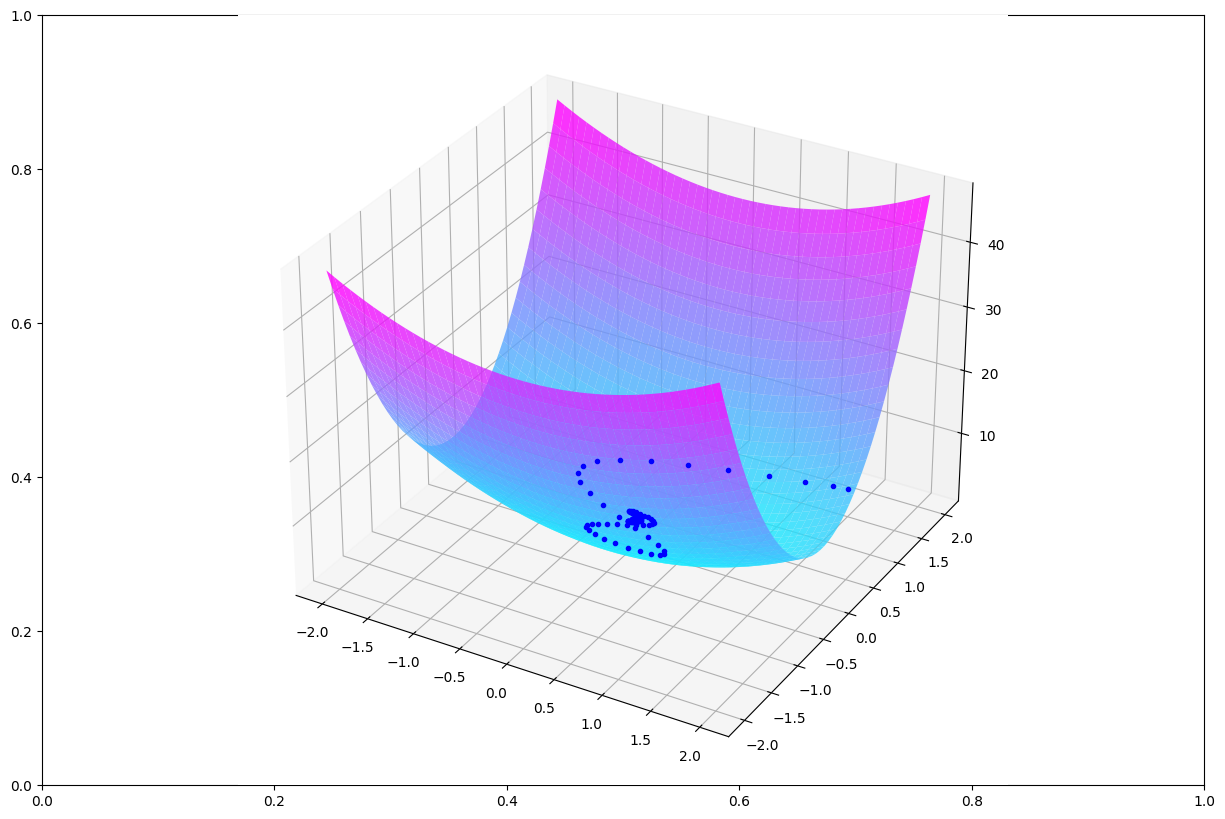

In [ ]:
p=50
u = np.linspace(-2, 2, p)
v = np.linspace(-2, 2, p)

U, V = np.meshgrid(u, v)

for i in range(p):
    for j in range(p):
        Z[i,j] = quadra_function([u[i],v[j]])
 
fig, ax = pl.subplots(1,1, figsize=(15, 10))
ax = pl.axes(projection='3d')
 
ax.plot_surface(U, V, Z, cmap='cool', alpha=0.8)
for point in Points_mom:
    ax.plot(point[0], point[1], function(point[0], point[1])+e, 'b.',  zorder=4)

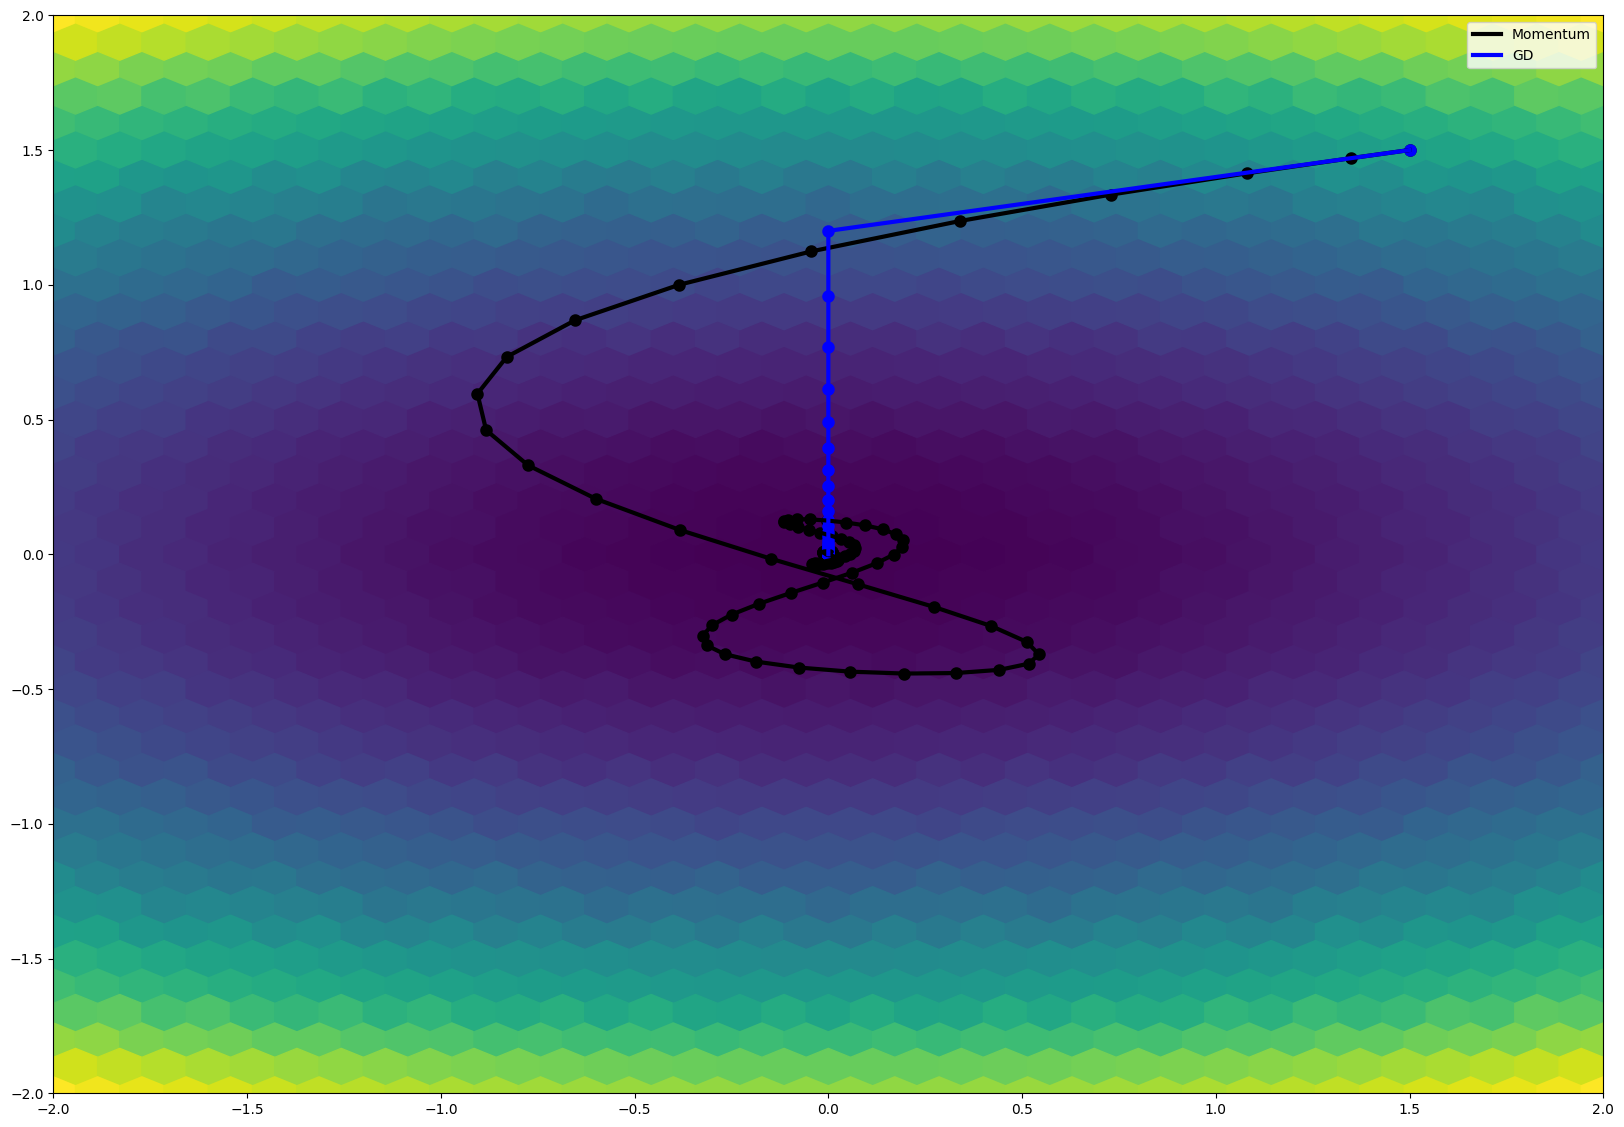

In [ ]:
fig, ax = pl.subplots(1,1, figsize = (20,14))
u = U.ravel()
v = V.ravel()
gridsize=35
ax.hexbin(u,v, C=Z.ravel(), gridsize=gridsize, bins=None)
ax.axis([u.min(), u.max(), v.min(), v.max()])
ax.plot(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3, label='Momentum')
ax.scatter(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3)
ax.plot(Points[:,0],Points[:,1], color='blue', linewidth=3, label='GD')
ax.scatter(Points[:,0],Points[:,1], color='blue', linewidth=3)
ax.legend()

# Plateau

In [ ]:
def saddle_function(x):
    s = x[0]
    t = x[1]
    return - np.exp(-(s-3)**2) + np.exp(-(x+3)**2) + 1/70*t**2

def grad_saddle(x):
    s = x[0]
    t = x[1]
    ds = 2*((s-3)*np.exp(-(s-3)**2)-(s+3)*np.exp(-(s+3)**2))
    dt = 1/35*t
    return np.array([ds, dt])

In [ ]:
grad_saddle(np.array([2,2]))

array([-0.73575888,  0.05714286])

In [ ]:
n_iter = 200
S = 1
beta = 0.7
x0 = np.array([-2.5,0.])

x_star, Points, Distances, Objectives = GD(x0, saddle_function, grad_saddle, S, n_iter, np.array([0,0]))
x_star_mom, Points_mom, Distances_mom, Objectives_mom = momentum(x0, saddle_function, grad_saddle, S, beta, n_iter, np.array([0,0]))

C:\Users\lmmla\AppData\Local\Temp\ipykernel_12032\1650538788.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  ax.plot(Points_mom[:,0], Points_mom[:,1], zp_mom, 'b.', color='black', zorder=4)


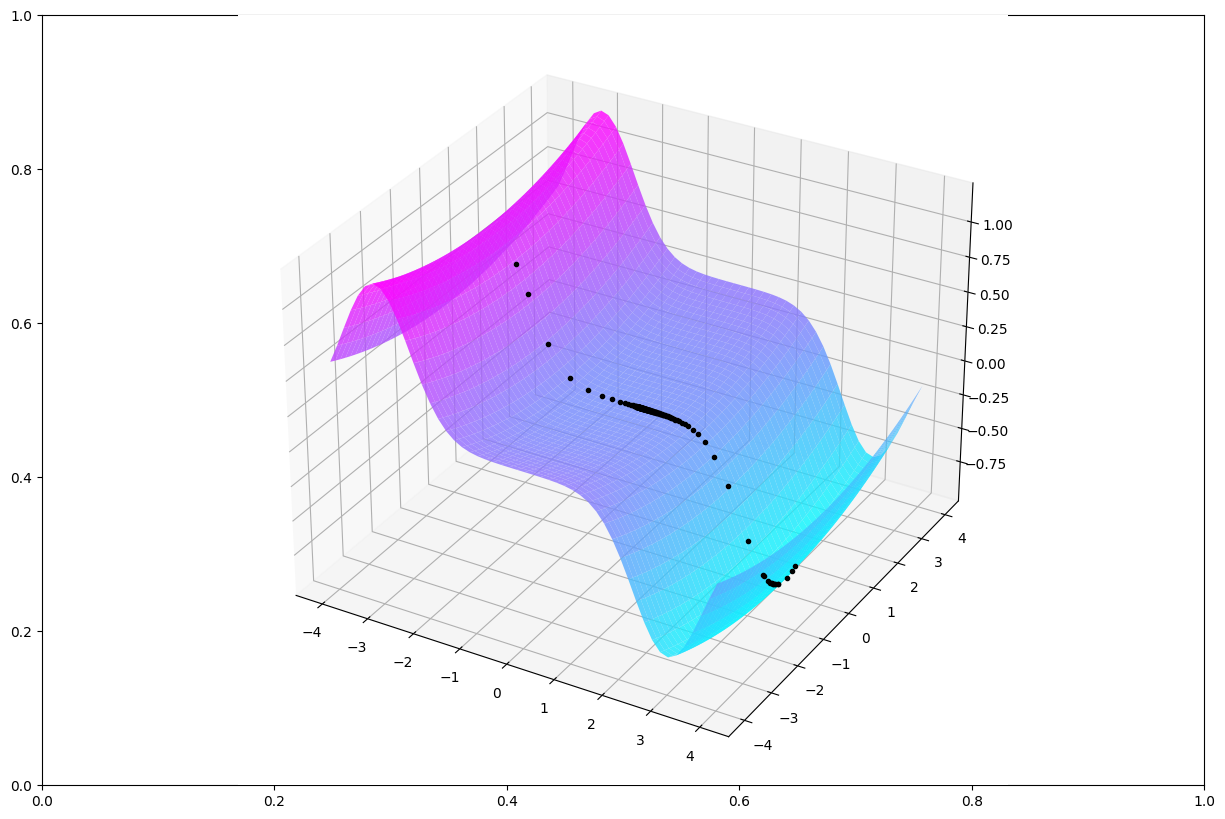

In [ ]:
u = np.linspace(-4, 4, p)
v = np.linspace(-4, 4, p)

U, V = np.meshgrid(u, v)

Z = -np.exp(-(U-3)**2) + np.exp(-(U+3)**2) + 1/70*V**2
fig, ax = pl.subplots(1,1, figsize=(15, 10))
ax = pl.axes(projection='3d')

ax.plot_surface(U, V, Z, cmap='cool', alpha=0.8)

zp = -np.exp(-(Points[:,0]-3)**2) + np.exp(-(Points[:,0]+3)**2) + 1/70*Points[:,1]**2
#ax.plot(Points[:,0], Points[:,1], zp, 'b.',  zorder=4)

zp_mom = -np.exp(-(Points_mom[:,0]-3)**2) + np.exp(-(Points_mom[:,0]+3)**2) + 1/70*Points_mom[:,1]**2
ax.plot(Points_mom[:,0], Points_mom[:,1], zp_mom, 'b.', color='black', zorder=4)

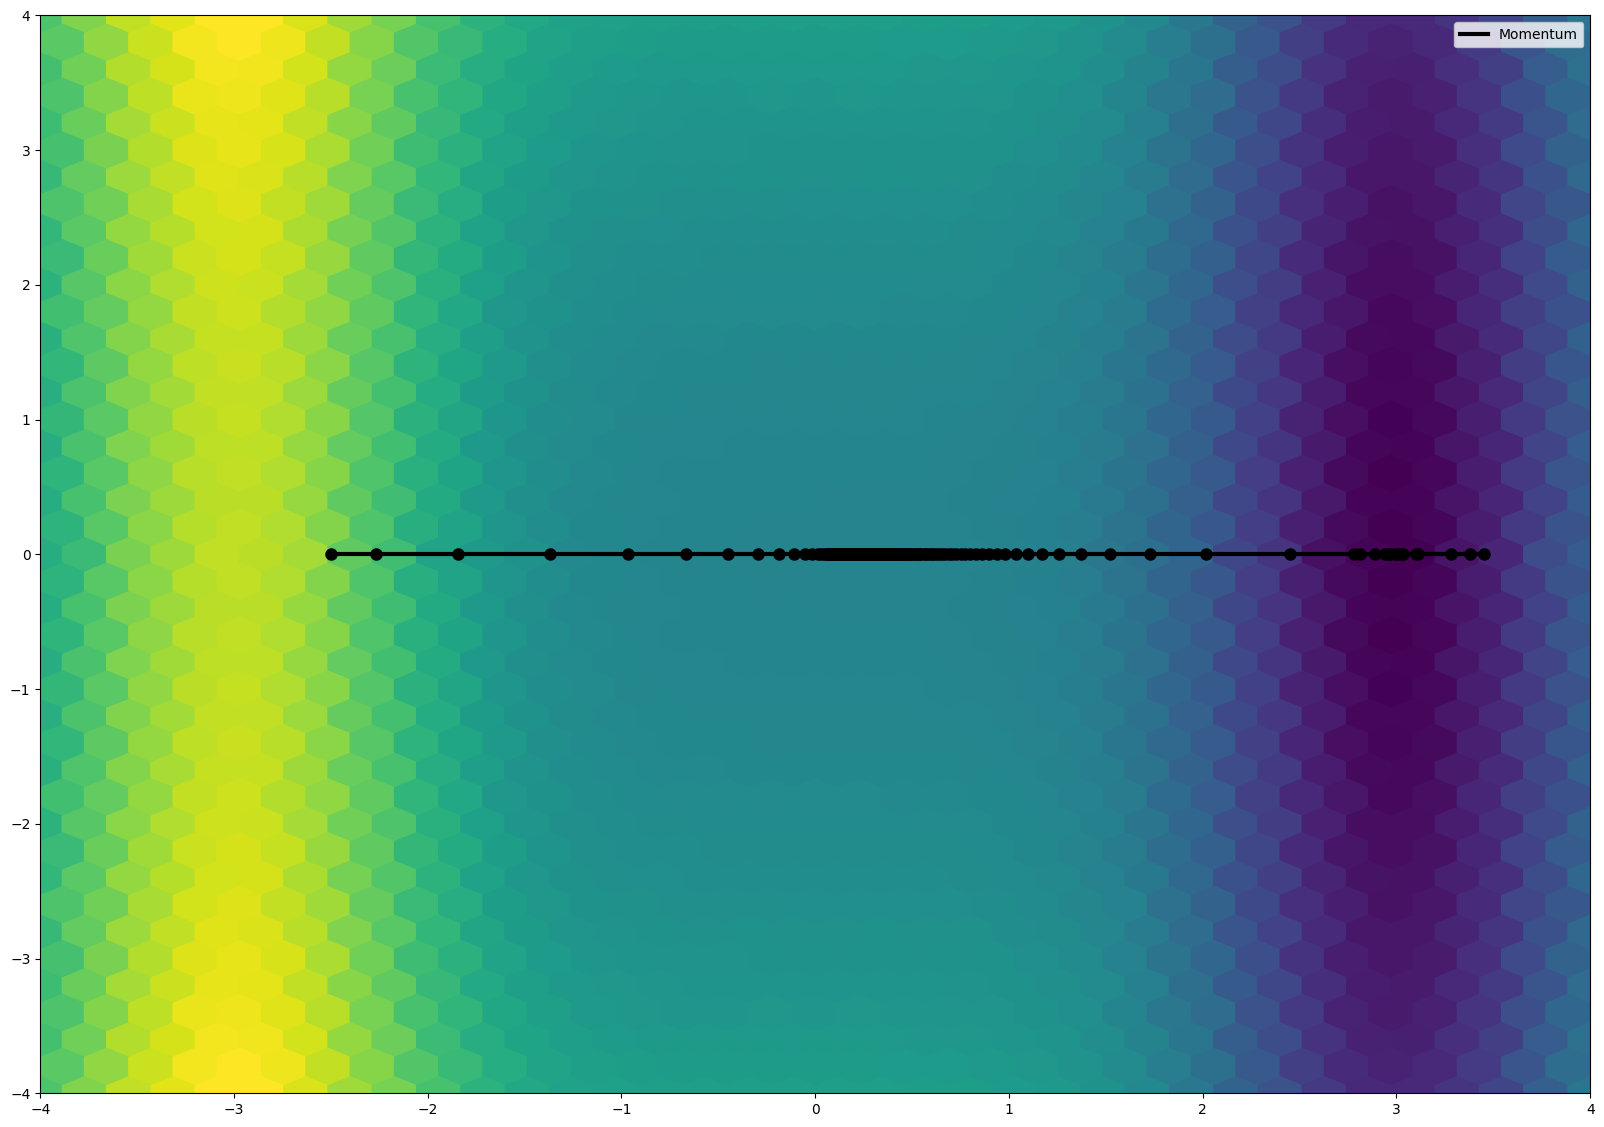

In [ ]:
fig, ax = pl.subplots(1,1, figsize = (20,14))
u = U.ravel()
v = V.ravel()
gridsize=35
ax.hexbin(u,v, C=Z.ravel(), gridsize=gridsize, bins=None)
ax.axis([u.min(), u.max(), v.min(), v.max()])
ax.plot(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3, label='Momentum')
ax.scatter(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3)
#ax.plot(Points[:,0],Points[:,1], color='blue', linewidth=3, label='GD')
#ax.scatter(Points[:,0],Points[:,1], color='blue', linewidth=3)
ax.legend()

# Variance

In [ ]:
M1 = np.array([[0.05,0],[0,1.5]])

def v_function(x):
    return x.dot(M1.dot(x))

def grad_v(x):
    return M1.dot(x)

In [ ]:
n_iter = 200
S = 1/1.5
beta = 0.92
x0 = np.array([-3.7,-2.])

x_star, Points, Distances, Objectives = GD(x0, v_function, grad_v, S, n_iter, np.array([0,0]))
x_star_mom, Points_mom, Distances_mom, Objectives_mom = momentum(x0, v_function, grad_v, S, beta, n_iter, np.array([0,0]))

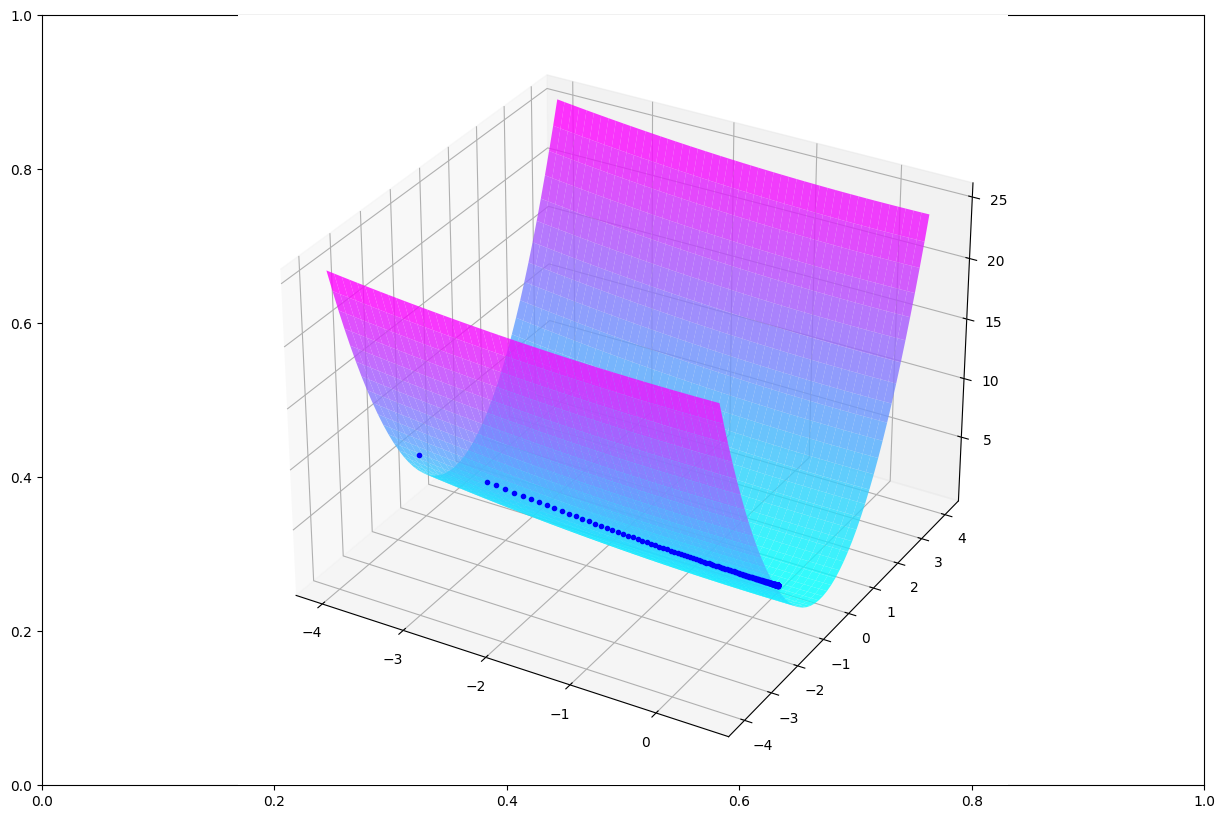

In [ ]:
u = np.linspace(-4, 0.5, p)
v = np.linspace(-4, 4, p)

U, V = np.meshgrid(u, v)

Z = 0.1*U**2 + 1.5*V**2 
fig, ax = pl.subplots(1,1, figsize=(15, 10))
ax = pl.axes(projection='3d')

ax.plot_surface(U, V, Z, cmap='cool', alpha=0.8)

zp = 0.1*Points[:,0]**2 + 1.5*Points[:,1]**2
ax.plot(Points[:,0], Points[:,1], zp, 'b.',  zorder=4)

#zp_mom = 0.1*Points_mom[:,0]**2 + 1.5*Points_mom[:,1]**2
#ax.plot(Points_mom[:,0], Points_mom[:,1], zp_mom, 'b.', color='black', zorder=4)

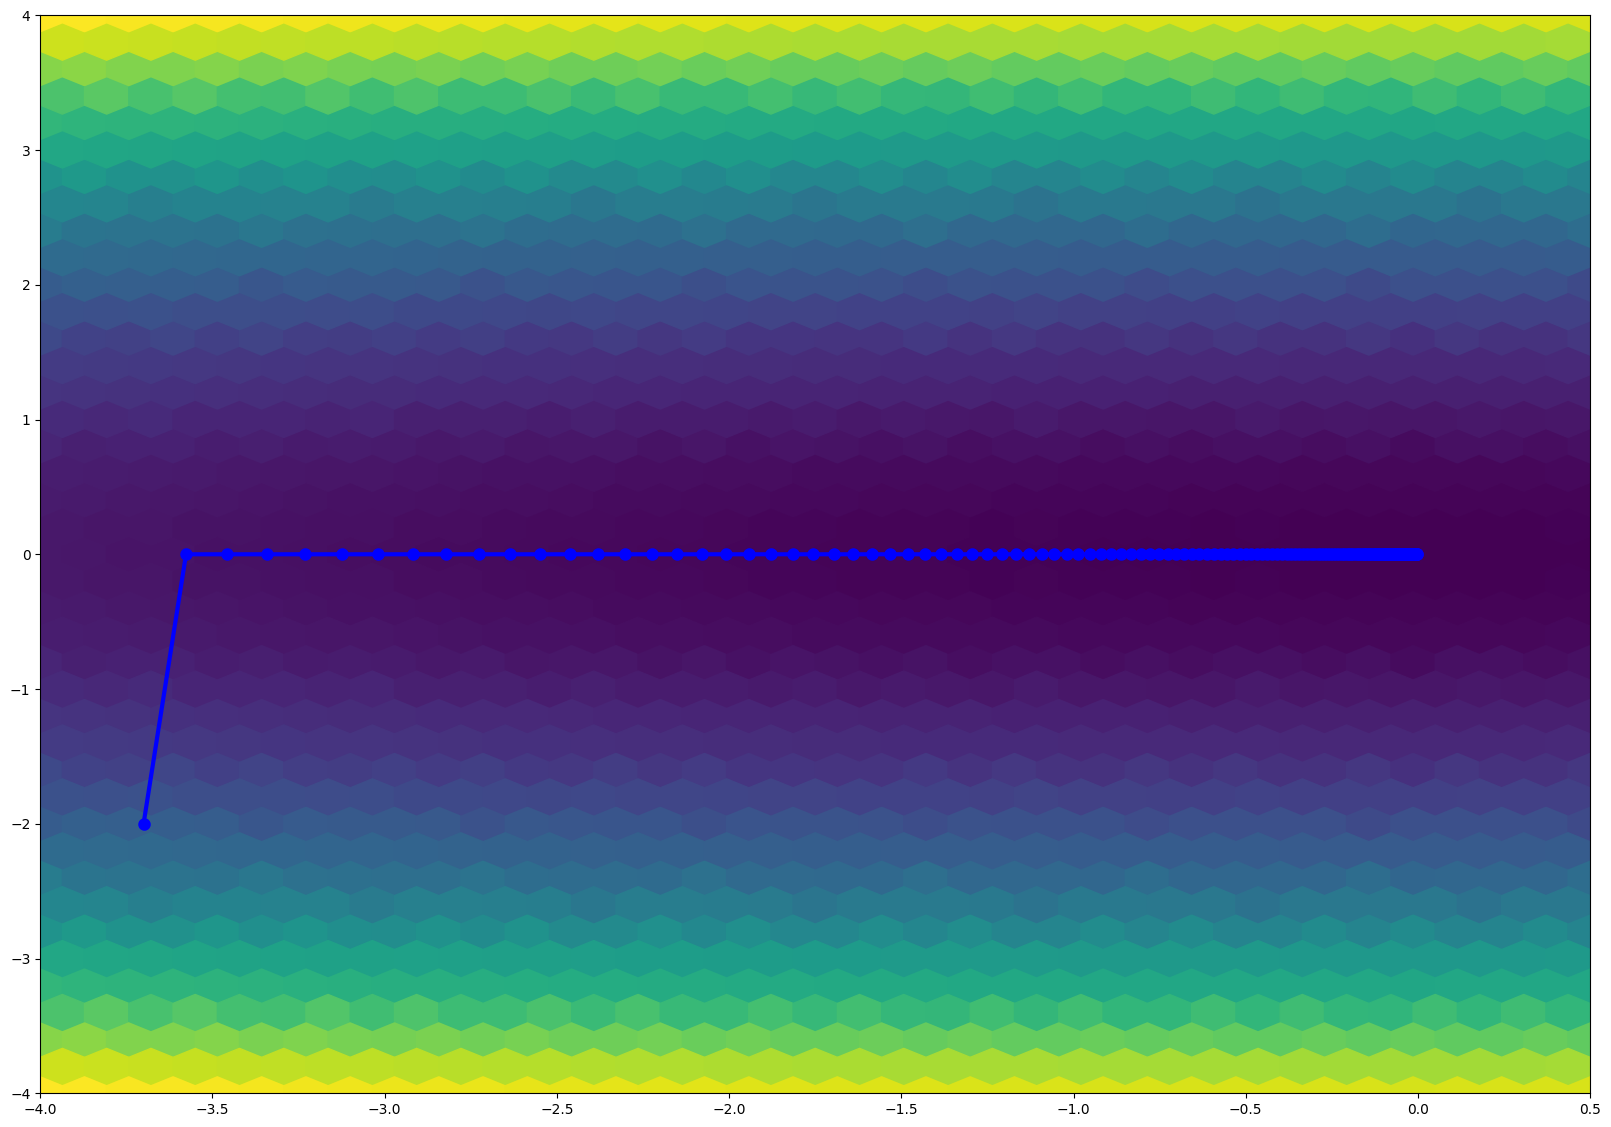

In [ ]:
fig, ax = pl.subplots(1,1, figsize = (20,14))
u = U.ravel()
v = V.ravel()
gridsize=35
ax.hexbin(u,v, C=Z.ravel(), gridsize=gridsize, bins=None)
ax.axis([u.min(), u.max(), v.min(), v.max()])
ax.plot(Points[:,0],Points[:,1], color='blue', linewidth=3, label='GD')
ax.scatter(Points[:,0],Points[:,1], color='blue', linewidth=3)
#ax.plot(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3, label='Momentum')
#ax.scatter(Points_mom[:,0],Points_mom[:,1], color='black', linewidth=3)
#ax.legend()